In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

 ## Machine Learning regressions to predict housing price 
 
Terdapat sebuah dataset suatu iklan properti yang tersebar di beberapa negara amerika latin. Melalui dataset ini kita ingin melakukan analisis agar dapat memprediksi harga suatu rumah dengan model regresi pada machine learning. Kegunaan dari model ini nantinya dapat digunakan oleh suatu developer untuk menentukan harga rumah yang tepat sesuai kebutuhan pelanggan.

Isi kolom dari dataset ini berupa :

Columns
id - Notice identifier. It is not unique: if the notification is updated by the real estate agency (new version of the notification) a new record is created with the same id but different dates: registration and cancellation.

operation_type - Type of operation (these are all sales, can be removed).

l2 - Administrative level 2: usually province

l3 - Administrative level 3: usually city

lat - Latitude.

lon - Longitude.

price - Price published in the ad.

property_type - Type of property (House, Apartment, PH).

rooms - Number of rooms (useful in Argentina).

bathrooms - Number of bathrooms.

start_date - Date when the ad was created.

end_date - Date of termination of the advertisement.

created_on - Date when the first version of the notice was created.

surface_total - Total area in m².

surface_covered - Covered area in m².

title - Title of the advertisement.

description - Description of the advertisement.

ad_type - Type of ad (Property, Development/Project).

Acknowledgements
The data in this dataset was collected by Properati.

In [2]:
df = pd.read_csv('ar_properties.csv')
df

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,wdQ5hWhv8P14T7Sh9g4QCg==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-32.716652,-68.642692,Argentina,Mendoza,NaN,...,NaN,350.0,350.0,NaN,NaN,NaN,Excelentes Lotes Sobre Ruta 34,Corredor Responsable: VICTOR E. MONTIVERO - C....,Lote,Venta
1,nnMBYZ4RMRY+vm753EtA+g==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-24.797723,-65.467514,Argentina,Salta,NaN,...,NaN,1541.0,1541.0,NaN,NaN,Mensual,TERRENO + VENTA + JARDINES DE SAN LORENZO +150...,Corredor Responsable: Pablo Castañeda - C.U.C....,Lote,Venta
2,+dnVA1K6JxzL1zAjOEQ1pA==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-34.919373,-58.020591,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,...,NaN,1000.0,1000.0,NaN,NaN,Mensual,Lote en Venta de 1000 m2 en La Plata,Corredor Responsable: Rico Sebastián - Martill...,Lote,Venta
3,dLHXKN5/sRZpm9Yk0yI2nA==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-34.919455,-58.024807,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,...,NaN,1000.0,1000.0,NaN,NaN,Mensual,Lote en Venta de 1000 m2 en La Plata,Corredor Responsable: Rico Sebastián - Martill...,Lote,Venta
4,wtw/k887EPipd37UYHKb1Q==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-34.364924,-58.783143,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,...,NaN,18164.0,18164.0,NaN,NaN,Mensual,PANAMERICANA 47300,Nave principal 66 x 90 m: 6005 m2 cubiertos...,Otro,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,SEeK1Z96Q3KuTKhNyREFDg==,Propiedad,2020-05-12,2020-09-02,2020-05-12,-34.900186,-56.176744,Uruguay,Montevideo,NaN,...,2.0,58.0,55.0,23000.0,UYU,Mensual,Apartamento en ALQUILER 2 dormitorios - Cordón:,Apartamento en ALQUILER 2 dormitorios - Cordón...,Departamento,Alquiler
999996,9rprv1XJCeNLnJP9dgWy0A==,Propiedad,2020-05-12,2020-05-28,2020-05-12,-34.886879,-56.188048,Uruguay,Montevideo,NaN,...,1.0,62.0,62.0,25000.0,UYU,Mensual,Apartamento alquiler a estrenar 2 dormitorios ...,Apartamento moderno a estrenar de 2 dormitorio...,Departamento,Alquiler
999997,ABzRp7AdRjDSFxKP1iNeYA==,Propiedad,2020-05-12,2020-08-11,2020-05-12,-34.891367,-56.098215,Uruguay,Montevideo,NaN,...,2.0,NaN,85.0,48000.0,UYU,Mensual,Casa - Malvín,"EN EL CORAZON DE MALVIN, CERCA DE TODO<br><br>...",Casa,Alquiler
999998,/dXMbrn3glBxu4WQBQu6IA==,Propiedad,2020-05-12,9999-12-31,2020-05-12,-34.462092,-57.842109,Uruguay,Colonia,NaN,...,1.0,135.0,135.0,35000.0,UYU,Mensual,House - Colonia del Sacramento,"Casa de tres dormitorios en muy linda cuadra, ...",Casa,Alquiler


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              849189 non-null   float64
 6   lon              848255 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               946673 non-null   object 
 10  l4               239496 non-null   object 
 11  l5               5001 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            526423 non-null   float64
 14  bedrooms         466213 non-null   float64
 15  bathrooms        776733 non-null   float64
 16  surface_total    37

In [4]:
df.isna().sum()

id                       0
ad_type                  0
start_date               0
end_date                 0
created_on               0
lat                 150811
lon                 151745
l1                       0
l2                       0
l3                   53327
l4                  760504
l5                  994999
l6                 1000000
rooms               473577
bedrooms            533787
bathrooms           223267
surface_total       620499
surface_covered     618549
price                36902
currency             38281
price_period        636985
title                    0
description             18
property_type            0
operation_type           0
dtype: int64

In [5]:
pd.crosstab(df['l1'], 'Jumlah')

col_0,Jumlah
l1,
Argentina,985725
Brasil,99
Estados Unidos,705
Uruguay,13471


In [6]:
df_A = df.loc[(df['l1'] == 'Argentina') & (df['property_type'] == 'Casa')]
df_A

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
15,FBO0kGkWmi9pfBMe/yvb4g==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-38.981655,-61.324535,Argentina,Buenos Aires Costa Atlántica,Monte Hermoso,...,2.0,NaN,NaN,NaN,NaN,Mensual,Cabañas Max - Casa para 2 a 5 personas con coc...,Cabañas Max - Casa para 2 a 5 personas con coc...,Casa,Alquiler temporal
27,pC5JkluyzV+EFoEIkEwcHg==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-41.161823,-71.370921,Argentina,Río Negro,San Carlos de Bariloche,...,5.0,2815.0,459.0,NaN,NaN,Mensual,Bellisima casa en Arelauquen en venta,Corredor Responsable: MARIA DEL ROSARIO NEME -...,Casa,Venta
47,N6VlSrMbt0mc0VBYhdonYw==,Propiedad,2020-12-25,2021-01-01,2020-12-25,-31.728437,-65.004607,Argentina,Córdoba,Mina Clavero,...,3.0,NaN,NaN,5800.0,ARS,NaN,ALQUILO CABAÑAS- TEMPORAL - para 6 personas $8...,<b>ALQUILO CABAÑAS- TEMPORAL - para 6 personas...,Casa,Alquiler temporal
60,sVGosQIKEN7Bor0quZ1Ifw==,Propiedad,2020-12-25,2021-02-09,2020-12-25,-24.782371,-65.458252,Argentina,Salta,Salta,...,1.0,250.0,130.0,4000000.0,ARS,NaN,CASA + VENTA + ZONA OESTE + 2 DORMITORIOS,Corredor Responsable: Pablo Castañeda - C.U.C....,Casa,Venta
61,Uac5IDH+XKgWQE3ORXRyRg==,Propiedad,2020-12-25,2020-12-30,2020-12-25,-24.731991,-65.483344,Argentina,Salta,NaN,...,3.0,1560.0,400.0,90000.0,ARS,NaN,"ALQUILER + CASA + 1,560 M2 + SAN LORENZO + 5 DOR",Corredor Responsable: Pablo Castañeda - C.U.C....,Casa,Alquiler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999974,exj9XfZGJX/uzFhlnJVn+A==,Propiedad,2020-05-12,2020-06-23,2020-05-12,NaN,NaN,Argentina,Buenos Aires Interior,Benito Juárez,...,8.0,1330.0,NaN,10000.0,USD,Mensual,Casa en Venta en Cancun Puerto Cancun Zona Hot...,Casa en Venta o Renta en Cancun Puerto Cancun ...,Casa,Alquiler
999975,vmnUhCVsRvHCJpUjDo65qw==,Propiedad,2020-05-12,9999-12-31,2020-05-12,-34.835006,-58.397961,Argentina,Bs.As. G.B.A. Zona Sur,Almirante Brown,...,2.0,NaN,NaN,150000.0,USD,NaN,"Casa en Venta en Burzaco, almirante brown U$...","SOBRE LA CALLE LUPO N º48, ENTRE WILSON Y LA ...",Casa,Venta
999976,wzkL2TIX1LME7QL0I5LzQQ==,Propiedad,2020-05-12,9999-12-31,2020-05-12,-34.833611,-58.379659,Argentina,Bs.As. G.B.A. Zona Sur,Almirante Brown,...,3.0,NaN,NaN,135000.0,USD,NaN,"Casa en Venta en Burzaco, almirante brown U$...",UBICADO EN CALLE LUIS VIALE Nº 332 (CORIMAYO...,Casa,Venta
999977,3G/cvrya9eXZhMNPlIHwwQ==,Propiedad,2020-05-12,9999-12-31,2020-05-12,-34.863213,-58.392490,Argentina,Bs.As. G.B.A. Zona Sur,Almirante Brown,...,2.0,NaN,NaN,100000.0,USD,NaN,"Casa en Venta en Longchamps, almirante brown ...",SOBRE LA CALLE SAN MARTIN Nº1.025 ENTRE CARLOS...,Casa,Venta


### Data Wrangling

#### Currency Anomalies
Terdapat harga rumah yang terdiri dari beberapa harga dengan mata uang yang berbeda, fungsi di bawah akan mengubah semua mata uang yang digunakan menjadi USD.

In [7]:
pd.crosstab(df_A['currency'], 'Jumlah')

col_0,Jumlah
currency,
ARS,23035
PEN,29
USD,152468


In [8]:
df_A.loc[(df_A['currency'] == 'ARS') | (df_A['currency'] == 'PEN'), ['price', 'currency']]

,price,currency
47,5800.0,ARS
60,4000000.0,ARS
61,90000.0,ARS
392,9000.0,ARS
397,8000.0,ARS
...,...,...
997656,110000.0,ARS
997657,70000.0,ARS
997658,3200000.0,ARS
997659,170000.0,ARS


In [9]:
for i in df_A['currency'].unique():
    if i == 'ARS':
        df_A.loc[df_A['currency'] == i, 'price'] =  df_A.loc[df_A['currency'] == i, 'price'] * 0.009
        df_A.loc[df_A['currency'] == i, 'currency'] =  'USD'
    elif i == 'PEN':
        df_A.loc[df_A['currency'] == i, 'price'] = df_A.loc[df_A['currency'] == i, 'price'] * 0.27
        df_A.loc[df_A['currency'] == i, 'currency'] =  'USD'
    else:
        df_A.loc[df_A['currency'] == i, 'price'] = df_A.loc[df_A['currency'] == i, 'price'] 

In [10]:
df_A[['price', 'currency']].sample(10)

,price,currency
285293,171.0,USD
595331,110000.0,USD
252840,245000.0,USD
543303,405.0,USD
782548,135000.0,USD
962663,72000.0,USD
270844,103.5,USD
766334,55000.0,USD
354446,200000.0,USD
996686,220000.0,USD


### Handling Missing Value (General)

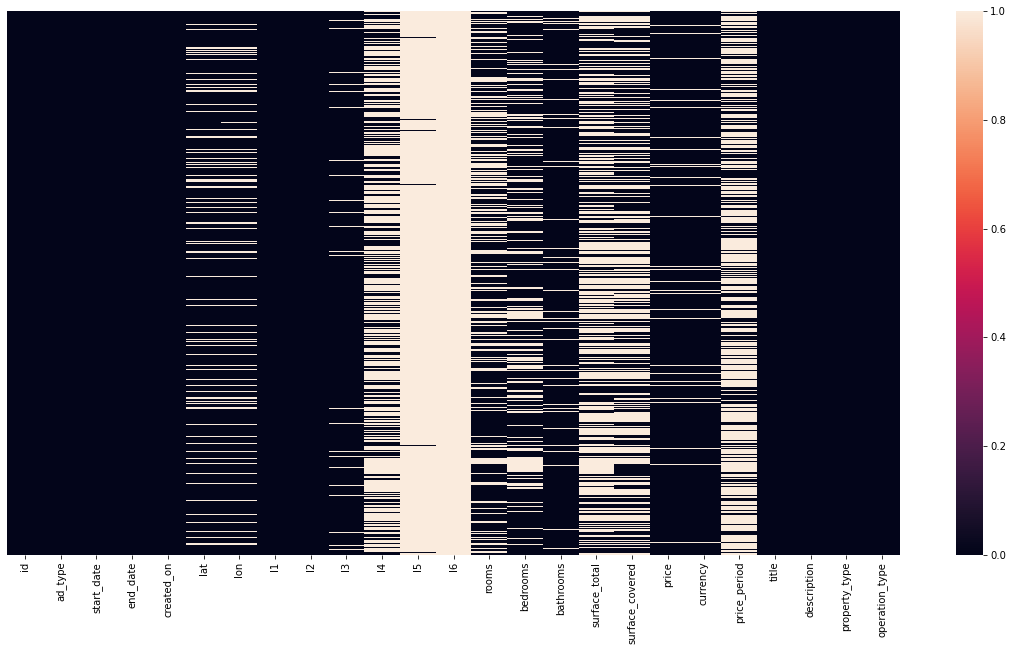

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df_A.isna(), yticklabels=False)
plt.show()

In [12]:
datamiss = {}
for i in df_A.columns:
    datamiss[i] = ((df_A[i].isna().sum()/len(df_A[i]))*100).round(2)
pd.DataFrame(datamiss, index = ['Missing_Value']).T.sort_values('Missing_Value', ascending=False)

,Missing_Value
l6,100.00
l5,98.59
price_period,63.50
l4,60.75
surface_total,55.13
surface_covered,46.33
rooms,32.48
bedrooms,24.14
lon,15.37
lat,15.24


Untuk Missing Value yang berjumlah > 60 % akan di drop, karena informasi yang dihasilkan tidak dapat merepresentasikan data.

In [13]:
for i in df_A.columns:
    if df_A[i].isna().sum() > 0.6*(len(df_A[i])):
        df_A.drop(columns = i, inplace = True)
    else:
        continue

### Features Selection (General)

Selanjutnya akan dilakukan pemilihan feature dengan asumsi hipotesa fitur yg dipilih akan berpengaruh terhadap target modelling nanti

In [14]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185775 entries, 15 to 999980
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               185775 non-null  object 
 1   ad_type          185775 non-null  object 
 2   start_date       185775 non-null  object 
 3   end_date         185775 non-null  object 
 4   created_on       185775 non-null  object 
 5   lat              157472 non-null  float64
 6   lon              157214 non-null  float64
 7   l1               185775 non-null  object 
 8   l2               185775 non-null  object 
 9   l3               179220 non-null  object 
 10  rooms            125444 non-null  float64
 11  bedrooms         140931 non-null  float64
 12  bathrooms        171160 non-null  float64
 13  surface_total    83362 non-null   float64
 14  surface_covered  99704 non-null   float64
 15  price            175831 non-null  float64
 16  currency         175532 non-null  obj

- id akan di drop karena tidak mencakup informasi yg dibutuhkan
- ad_type, start_date, end_date, created_on akan di drop karena tidak sesuai dengan kebutuhan informasi. dimana ad_type hanya memuat 1 jenis informasi, sedangkan tanggal iklan merupakan penentuan yg dipilih oleh si pembuat iklan, sehingga tidak berpengaruh terhadap harga rumah.
- l1 akan di drop karena fokus model hanya pada l1 = argentina.
- currency akan di drop karena merupakan informasi pendukung terhadap price.
- title dan description akan dihapus karena tidak memiliki pengaruh terhadap harga rumah.
- property_type akan di drop karena properti sudah ditentukan hanya properti jenis rumah('Casa').

In [15]:
## dropping some features
df_A.drop(columns = ['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'l1', 'currency', 'title', 'description', 'property_type'], inplace = True)

In [16]:
df_A.head()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,operation_type
15,-38.981655,-61.324535,Buenos Aires Costa Atlántica,Monte Hermoso,2.0,2.0,2.0,NaN,NaN,NaN,Alquiler temporal
27,-41.161823,-71.370921,Río Negro,San Carlos de Bariloche,9.0,4.0,5.0,2815.0,459.0,NaN,Venta
47,-31.728437,-65.004607,Córdoba,Mina Clavero,3.0,2.0,3.0,NaN,NaN,52.2,Alquiler temporal
60,-24.782371,-65.458252,Salta,Salta,6.0,2.0,1.0,250.0,130.0,36000.0,Venta
61,-24.731991,-65.483344,Salta,NaN,9.0,5.0,3.0,1560.0,400.0,810.0,Alquiler


### Handling Missing Value (Spesific Features)

In [17]:
df_A.isna().sum()

lat                 28303
lon                 28561
l2                      0
l3                   6555
rooms               60331
bedrooms            44844
bathrooms           14615
surface_total      102413
surface_covered     86071
price                9944
operation_type          0
dtype: int64

### Mengisi kolom yang kosong
- untuk tipe data diskrit numerik akan diambil nilai mediannya. (`rooms`, `bedrooms`, `bathrooms`)
- untuk tipe data kategorik/nominal akan diambil nilai modusnya. (`l3`)
- untuk tipe data conitnous numerik akan dicek terlebih dahulu tipe datanya, untuk menentukan central of tendency nya.(`lat`, `lon`, `surface_total`, `surface_covered`)

In [18]:
## Checking lat, pengujian normalitas menggunakan shapiro
from scipy.stats import shapiro
def testnormal(data):
    norm, pval = shapiro(data)
    if pval < 0.05 :
        return (f'P-Value ({pval} < 5%), DATA TIDAK BERDISTRIBUSI NORMAL')
    else :
        return (f'P-Value ({pval} > 5%), DATA BERDISTRIBUSI NORMAL')

In [19]:
data = {'lat' : testnormal(df_A['lat']),
       'lon' : testnormal(df_A['lon']),
       'surface_total' : testnormal(df_A['surface_total']),
       'surface_covered' : testnormal(df_A['surface_covered'])}
pd.DataFrame(data, index = ['Normalitas']).T

,Normalitas
lat,"P-Value (1.0 > 5%), DATA BERDISTRIBUSI NORMAL"
lon,"P-Value (1.0 > 5%), DATA BERDISTRIBUSI NORMAL"
surface_total,"P-Value (1.0 > 5%), DATA BERDISTRIBUSI NORMAL"
surface_covered,"P-Value (1.0 > 5%), DATA BERDISTRIBUSI NORMAL"


- Karena `lat`, `lon`, `surface_total`, `surface_covered` berdistribusi normal, maka nilai yg diambil adalah nilai mean nya.

In [20]:
## Pengisian fitur yg memiliki missing value
data = {}
for i in df_A.columns :
    if i == 'rooms':
        data[i] = df_A[i].median()
    elif i == 'bedrooms':
        data[i] = df_A[i].median()
    elif i == 'bathrooms':
        data[i] = df_A[i].median()
    elif i == 'l3':
        data[i] = df_A[i].mode()[0]
    elif i == 'lat':
        data[i] = df_A[i].mean()
    elif i == 'lon':
        data[i] = df_A[i].mean()
    elif i == 'surface_total':
        data[i] = df_A[i].mean()
    elif i == 'surface_covered':
        data[i] = df_A[i].mean()
    else:
        continue
df_A.fillna(data,inplace = True)

In [21]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185775 entries, 15 to 999980
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              185775 non-null  float64
 1   lon              185775 non-null  float64
 2   l2               185775 non-null  object 
 3   l3               185775 non-null  object 
 4   rooms            185775 non-null  float64
 5   bedrooms         185775 non-null  float64
 6   bathrooms        185775 non-null  float64
 7   surface_total    185775 non-null  float64
 8   surface_covered  185775 non-null  float64
 9   price            175831 non-null  float64
 10  operation_type   185775 non-null  object 
dtypes: float64(8), object(3)
memory usage: 17.0+ MB


### Menghapus data yang masih memiliki missing value
data yang kosong selanjutnya hanya dimiliki oleh kolom price, yang mana tidak dapat diisi karena nantinya data harga ini menjadi target prediksi dalam pemodelan. sehingga data yang kosong harus dihapus.

In [22]:
df_A.dropna(inplace = True)

In [23]:
# Previewed cleaning Data

listItem = []
for col in df_A.columns :
    listItem.append([col, df_A[col].dtype,
                     len(df_A),
                     df_A[col].isna().sum(),
                     round((df_A[col].isna().sum()/len(df_A[col])) * 100,2),
                     df_A[col].nunique(), 
                     list(df_A[col].drop_duplicates().sample(2).values)])

DFDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
DFDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,lat,float64,175831,0,0.0,84938,"[-34.812112, -31.304942]"
1,lon,float64,175831,0,0.0,84885,"[-58.5543690148, -58.6865606225]"
2,l2,object,175831,0,0.0,28,"[Formosa, Misiones]"
3,l3,object,175831,0,0.0,786,"[Empalme Villa Constitución, Palpalá]"
4,rooms,float64,175831,0,0.0,30,"[1.0, 4.0]"
5,bedrooms,float64,175831,0,0.0,38,"[20.0, 31.0]"
6,bathrooms,float64,175831,0,0.0,18,"[2.0, 18.0]"
7,surface_total,float64,175831,0,0.0,2168,"[84.0, 747.0]"
8,surface_covered,float64,175831,0,0.0,962,"[328.0, 30.0]"
9,price,float64,175831,0,0.0,3046,"[870000.0, 59400.0]"


In [24]:
df_B = df_A.copy()

## Machine Learning

### Feature Selection (Spesific)
Selanjutnya akan dilakukan pemilihan fitur yang spesifik dengan analisis dan pengujian statistika yang nantinya diharapkan sesuai dengan hasil model.

- untuk fitur l3 yang merupakan daerah lokasi memiliki 786 jenis lokasi yg berbeda, data ini akan sangat spesifik dan akan menyulitkan model dalam generalisasi datanya. maka fitur ini akan didrop.

In [25]:
df_B.drop(columns = 'l3', inplace = True)

- Melakukan pengecekan heatmap korelasi antar variabel yang bertipe data numerik

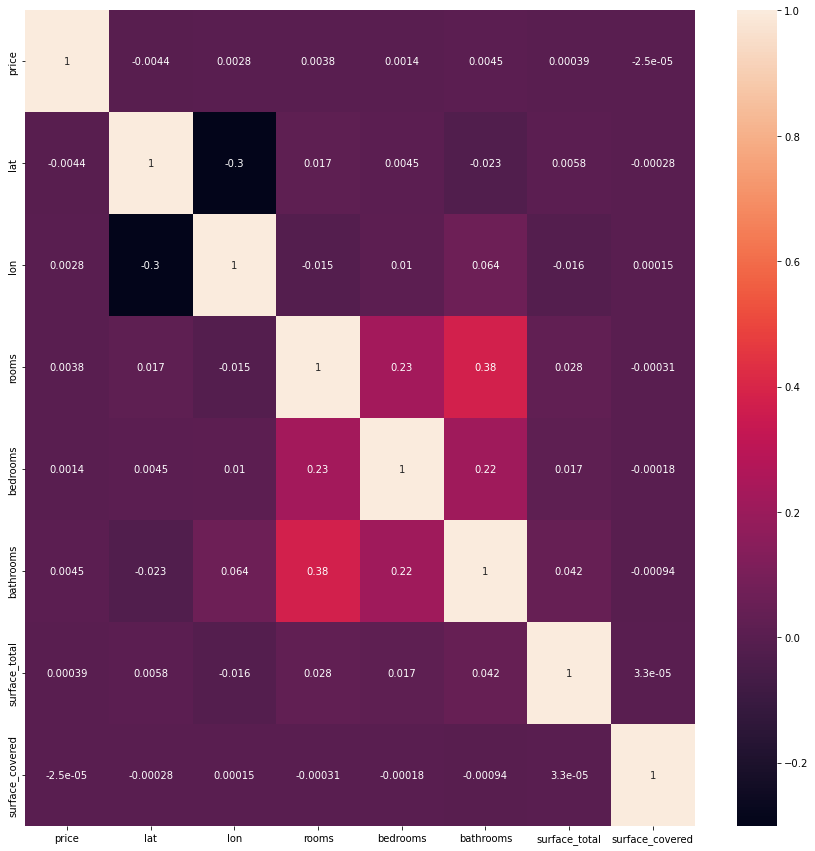

In [26]:
plt.figure(figsize = (15,15))
sns.heatmap(df_B[['price', 'lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']].corr(), annot=True)
plt.show()

Dilihat sekilas dari gambar di atas menunujukkan variabel yang dipilih, korelasinya cukup sesuai dengan yg diharapkan.

### Encoding
selanjutnya akan dilakukan encoding data untuk tipe data yang object menjadi numerik, agar data dapat digunakan dalam proses machine learning

In [27]:
df_B.describe(exclude='float')

,l2,operation_type
count,175831,175831
unique,28,3
top,Bs.As. G.B.A. Zona Norte,Venta
freq,56114,143101


In [28]:
df_B = pd.get_dummies(df_B, columns = ['operation_type', 'l2'])
df_B.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,operation_type_Alquiler,operation_type_Alquiler temporal,...,l2_Neuquén,l2_Río Negro,l2_Salta,l2_San Juan,l2_San Luis,l2_Santa Cruz,l2_Santa Fe,l2_Santiago Del Estero,l2_Tierra Del Fuego,l2_Tucumán
47,-31.728437,-65.004607,3.0,2.0,3.0,561.971102,21787.154507,52.2,0,1,...,0,0,0,0,0,0,0,0,0,0
60,-24.782371,-65.458252,6.0,2.0,1.0,250.000000,130.000000,36000.0,0,0,...,0,0,1,0,0,0,0,0,0,0
61,-24.731991,-65.483344,9.0,5.0,3.0,1560.000000,400.000000,810.0,1,0,...,0,0,1,0,0,0,0,0,0,0
62,-34.447046,-58.631853,4.0,4.0,1.0,561.971102,1.000000,5500.0,1,0,...,0,0,0,0,0,0,0,0,0,0
63,-34.447512,-58.631587,4.0,4.0,3.0,561.971102,1.000000,5500.0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting Data

- Pemilihan target yang merupakan variabel dependen, dalam hal ini `price`.
- Pemilihan fitur yang merupakan variabel independen, dalam hal ini semua fitur dalam dataframe kecuali kolom `price`.

In [29]:
X = df_B.drop(columns = 'price')
y = df_B['price']

Data kemudian akan dibagi menjadi 2 bagian, yaitu 80% data training dan 20% data testing. dimana data training berfungsi untuk dijadikan data pada model agar model dapat mempelajari pola yang terdapat dalam data training. Kemudian nantinya data testing dapat digunakan untuk melakukan testing pada model. **Tujuannya adalah untuk melihat apakah model yang dibuat sesuai dengan data historis yg ada, sehingga kita dapat meyakinkan model kita nantinya untuk memprediksi data baru.**

In [30]:
### Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [31]:
X_train.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,operation_type_Alquiler,operation_type_Alquiler temporal,operation_type_Venta,...,l2_Neuquén,l2_Río Negro,l2_Salta,l2_San Juan,l2_San Luis,l2_Santa Cruz,l2_Santa Fe,l2_Santiago Del Estero,l2_Tierra Del Fuego,l2_Tucumán
606091,-34.486132,-58.540468,4.0,4.0,3.0,330.000000,330.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
453225,-26.863205,-65.334183,3.0,3.0,4.0,662.000000,350.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,1
286567,-32.865107,-68.812009,7.0,4.0,2.0,200.000000,100.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62377,-34.425087,-58.579659,4.0,3.0,3.0,840.000000,185.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
176799,-34.453862,-59.640485,4.0,3.0,1.0,561.971102,21787.154507,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
## def function modelling dan hasil evaluation matrix
def Eva_Matrix_DF(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts = Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
    "Training " + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
    "Testing " + Nama: [R2_ts, MAE_ts, MSE_ts, RMSE_ts]}
    df = pd.DataFrame(data = data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
    return df

Selanjutnya akan digunakan model untuk kasus regresi, yaitu model `linear regression`, `Ridge`, `Lasso`, dan `ElasticNet`.

In [33]:
## Linreg
base_LinReg = Eva_Matrix_DF(LinearRegression(fit_intercept=False), X_train, X_test, y_train, y_test, "Linear Regression")

In [34]:
base_LinReg

,Training Linear Regression,Testing Linear Regression
R2,1.516878e-01,-5.387031e-03
MAE,1.349976e+05,4.376952e+05
MSE,1.815654e+11,2.858785e+15
RMSE,4.261049e+05,5.346761e+07


Sekilas dari hasil R2 yang dapat dilihat ialah model yang dibuat dengan linear regression terlalu mengikuti pola pada data training (Overfitting), bahkan untuk data testing model yang dibuat sangat buruk dari model variansi(mean) target. 

In [35]:
## Ridge
base_Ridge = Eva_Matrix_DF(Ridge(), X_train, X_test, y_train, y_test, "Ridge")

In [36]:
base_Ridge

,Training Ridge,Testing Ridge
R2,1.516876e-01,-5.377193e-03
MAE,1.349950e+05,4.376738e+05
MSE,1.815654e+11,2.858757e+15
RMSE,4.261049e+05,5.346735e+07


In [37]:
## Lasso
base_Lasso = Eva_Matrix_DF(Lasso(), X_train, X_test, y_train, y_test, "Lasso")

In [38]:
base_Lasso

,Training Lasso,Testing Lasso
R2,1.516876e-01,-5.374159e-03
MAE,1.349950e+05,4.376676e+05
MSE,1.815654e+11,2.858749e+15
RMSE,4.261049e+05,5.346727e+07


In [39]:
## ElasticNet
base_Enet = Eva_Matrix_DF(ElasticNet(), X_train, X_test, y_train, y_test, "Elastic Net")

In [40]:
base_Enet

,Training Elastic Net,Testing Elastic Net
R2,1.057524e-01,-9.632241e-03
MAE,1.441118e+05,4.542700e+05
MSE,1.913970e+11,2.870856e+15
RMSE,4.374894e+05,5.358037e+07


### Evaluation Matrix untuk Base Model

In [41]:
pd.concat([base_LinReg, base_Ridge, base_Lasso, base_Enet], axis = 1).T.sort_values('R2', ascending =False)

,R2,MAE,MSE,RMSE
Training Linear Regression,0.151688,134997.589645,1.815654e+11,4.261049e+05
Training Ridge,0.151688,134994.980002,1.815654e+11,4.261049e+05
Training Lasso,0.151688,134995.031739,1.815654e+11,4.261049e+05
Training Elastic Net,0.105752,144111.777202,1.913970e+11,4.374894e+05
Testing Lasso,-0.005374,437667.606266,2.858749e+15,5.346727e+07
Testing Ridge,-0.005377,437673.783873,2.858757e+15,5.346735e+07
Testing Linear Regression,-0.005387,437695.223540,2.858785e+15,5.346761e+07
Testing Elastic Net,-0.009632,454270.048488,2.870856e+15,5.358037e+07


- Dapat dilihat dari hasil evaluasi matrix di atas, bahwa secara keseluruhan model regresi yang dibuat sangat mengikuti pola data training, dapat dilihat dari hasil R2 untuk data training > R2 data testing (Overfitting). 
- Selanjutnya akan dilakukan feature engineering berupa scalling, menggunakan polynomial reggresion, dan tuning hyperparameter.

In [42]:
## Improvement 1 (Scalling)
X_train

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,operation_type_Alquiler,operation_type_Alquiler temporal,operation_type_Venta,...,l2_Neuquén,l2_Río Negro,l2_Salta,l2_San Juan,l2_San Luis,l2_Santa Cruz,l2_Santa Fe,l2_Santiago Del Estero,l2_Tierra Del Fuego,l2_Tucumán
606091,-34.486132,-58.540468,4.0,4.0,3.0,330.000000,330.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
453225,-26.863205,-65.334183,3.0,3.0,4.0,662.000000,350.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,1
286567,-32.865107,-68.812009,7.0,4.0,2.0,200.000000,100.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62377,-34.425087,-58.579659,4.0,3.0,3.0,840.000000,185.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
176799,-34.453862,-59.640485,4.0,3.0,1.0,561.971102,21787.154507,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656579,-34.510796,-58.517261,4.0,3.0,2.0,561.971102,130.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
559252,-34.438268,-58.837648,4.0,3.0,3.0,681.000000,182.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
748130,-34.399956,-58.638392,5.0,4.0,4.0,561.971102,21787.154507,0,0,1,...,0,0,0,0,0,0,0,0,0,0
843901,-30.706048,-64.067587,2.0,3.0,1.0,561.971102,50.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
sc = RobustScaler()

In [44]:
sc_train = sc.fit_transform(X_train)

In [45]:
X_train_sc = pd.DataFrame(sc_train)
X_train_sc

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.001226,0.107123,0.0,1.0,0.5,-0.885484,-0.004164,1.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22.349847,-5.412038,-1.0,0.0,1.0,0.381832,-0.003239,0.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.753689,-8.237398,3.0,1.0,0.0,-1.381721,-0.014805,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.180195,0.075285,0.0,0.0,0.5,1.061296,-0.010873,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.095833,-0.786523,0.0,0.0,-0.5,0.000000,0.988572,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140659,-0.071083,0.125977,0.0,0.0,0.0,0.000000,-0.013417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140660,0.141552,-0.134304,0.0,0.0,0.5,0.454359,-0.011011,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140661,0.253873,0.027570,1.0,1.0,1.0,0.000000,0.988572,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140662,11.083540,-4.383065,-2.0,0.0,-0.5,0.000000,-0.017118,1.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
sc_test = sc.transform(X_test)

In [47]:
X_test_sc = pd.DataFrame(sc_test)
X_test_sc

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.095833,-0.786523,0.0,0.0,0.0,-1.152689,-0.013510,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.711568,0.330541,0.0,0.0,-0.5,0.000000,0.988572,1.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095833,-0.786523,0.0,1.0,2.5,3.389797,0.988572,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.095833,-0.786523,-1.0,-1.0,-0.5,0.000000,0.988572,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-7.873248,1.436774,-1.0,0.0,0.0,0.000000,0.988572,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35162,0.180807,0.010381,0.0,0.0,1.0,-0.236557,-0.009716,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35163,0.095833,-0.786523,0.0,0.0,0.5,0.000000,0.988572,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35164,-0.936015,0.228588,-1.0,-1.0,-0.5,0.000000,0.988572,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35165,-1.349165,0.628107,1.0,1.0,-0.5,-0.923656,-0.016193,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
sc_LinReg = Eva_Matrix_DF(LinearRegression(fit_intercept=False), X_train_sc, X_test_sc, y_train, y_test, "Linear Regression")

In [49]:
sc_LinReg

,Training Linear Regression,Testing Linear Regression
R2,1.516878e-01,-5.387031e-03
MAE,1.349976e+05,4.376952e+05
MSE,1.815654e+11,2.858785e+15
RMSE,4.261049e+05,5.346761e+07


In [50]:
sc_Ridge = Eva_Matrix_DF(Ridge(), X_train_sc, X_test_sc, y_train, y_test, "Ridge")
sc_Ridge

,Training Ridge,Testing Ridge
R2,1.516876e-01,-5.376672e-03
MAE,1.349948e+05,4.376726e+05
MSE,1.815654e+11,2.858756e+15
RMSE,4.261049e+05,5.346733e+07


In [51]:
sc_Lasso = Eva_Matrix_DF(Lasso(), X_train_sc, X_test_sc, y_train, y_test, "Lasso")
sc_Lasso

,Training Lasso,Testing Lasso
R2,1.516876e-01,-5.366746e-03
MAE,1.349950e+05,4.376531e+05
MSE,1.815654e+11,2.858728e+15
RMSE,4.261049e+05,5.346707e+07


In [52]:
sc_Enet = Eva_Matrix_DF(ElasticNet(), X_train_sc, X_test_sc, y_train, y_test, "Elastic Net")
sc_Lasso

,Training Lasso,Testing Lasso
R2,1.516876e-01,-5.366746e-03
MAE,1.349950e+05,4.376531e+05
MSE,1.815654e+11,2.858728e+15
RMSE,4.261049e+05,5.346707e+07


In [53]:
pd.concat([sc_LinReg, sc_Ridge, sc_Lasso, sc_Enet], axis = 1).T.sort_values('R2', ascending =False)

,R2,MAE,MSE,RMSE
Training Linear Regression,0.151688,134997.589645,1.815654e+11,4.261049e+05
Training Ridge,0.151688,134994.829250,1.815654e+11,4.261049e+05
Training Lasso,0.151688,134994.970420,1.815654e+11,4.261049e+05
Training Elastic Net,0.088688,151518.531483,1.950493e+11,4.416439e+05
Testing Elastic Net,-0.002719,448362.475724,2.851198e+15,5.339661e+07
Testing Lasso,-0.005367,437653.132722,2.858728e+15,5.346707e+07
Testing Ridge,-0.005377,437672.617083,2.858756e+15,5.346733e+07
Testing Linear Regression,-0.005387,437695.223540,2.858785e+15,5.346761e+07


Dapat dilihat dengan melakukan scalling pada data training, hasil R2 pada testing sedikit naik dari -0.005374 (Testing Lasso base model) menjadi -0.002719 (Testing Elastic Net Scalling)

In [54]:
## Improvement (Polynomial)
def poly(deg, num_col):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    yeo_pow = PowerTransformer(method='yeo-johnson')
    num_poly = poly.fit_transform(num_col)
    num_pow = yeo_pow.fit_transform(num_poly)
    global df_pow
    df_pow = pd.DataFrame(num_pow)
    return df_pow

In [55]:
num_col = df_B[['lat', 'lon', 'surface_total', 'surface_covered']]
poly(2, num_col)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.380287,-2.191115,0.420430,1.048222,-1.385349,0.076581,-0.018702,-0.040960,2.191288,-0.555229,-1.078665,0.420109,0.827036,1.047986
1,4.461159,-2.362386,-0.779965,-1.034142,-4.524524,-3.253110,0.424388,0.039697,2.362939,0.640217,0.924578,-0.778864,-0.777567,-1.033624
2,4.481576,-2.371819,2.049235,-0.571250,-4.545557,-3.273172,-0.656232,0.037540,2.372395,-2.198346,0.707447,2.048017,-0.413339,-0.570142
3,0.035071,0.372384,0.420430,-2.801791,-0.032960,-0.249566,-0.070311,0.041371,-0.372555,-0.397448,1.336951,0.420109,-0.902551,-2.936849
4,0.034834,0.372498,0.420430,-2.801791,-0.032723,-0.249427,-0.070320,0.041371,-0.372668,-0.397441,1.336951,0.420109,-0.902551,-2.936849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175826,0.031602,-0.054284,1.785960,1.048222,-0.029486,0.018255,-0.856437,-0.045986,0.053491,-1.781966,-1.012721,1.784729,1.572985,1.047986
175827,-0.163104,0.472539,0.420430,1.048222,0.165472,-0.138373,-0.077593,-0.046679,-0.472524,-0.391360,-0.996863,0.420109,0.827036,1.047986
175828,-0.162389,0.480395,0.420430,1.048222,0.164756,-0.143850,-0.077567,-0.046677,-0.480366,-0.390883,-0.996628,0.420109,0.827036,1.047986
175829,-0.177573,0.474887,0.420430,1.048222,0.179952,-0.127276,-0.078122,-0.046731,-0.474868,-0.391218,-0.996793,0.420109,0.827036,1.047986


In [56]:
df_Poly = pd.concat([df_B.reset_index().drop(columns=['index', 'lon', 'lat', 'surface_total', 'surface_covered']), df_pow], axis = 1)
df_Poly

,rooms,bedrooms,bathrooms,price,operation_type_Alquiler,operation_type_Alquiler temporal,operation_type_Venta,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,...,4,5,6,7,8,9,10,11,12,13
0,3.0,2.0,3.0,52.2,0,1,0,0,0,0,...,-1.385349,0.076581,-0.018702,-0.040960,2.191288,-0.555229,-1.078665,0.420109,0.827036,1.047986
1,6.0,2.0,1.0,36000.0,0,0,1,0,0,0,...,-4.524524,-3.253110,0.424388,0.039697,2.362939,0.640217,0.924578,-0.778864,-0.777567,-1.033624
2,9.0,5.0,3.0,810.0,1,0,0,0,0,0,...,-4.545557,-3.273172,-0.656232,0.037540,2.372395,-2.198346,0.707447,2.048017,-0.413339,-0.570142
3,4.0,4.0,1.0,5500.0,1,0,0,1,0,0,...,-0.032960,-0.249566,-0.070311,0.041371,-0.372555,-0.397448,1.336951,0.420109,-0.902551,-2.936849
4,4.0,4.0,3.0,5500.0,1,0,0,1,0,0,...,-0.032723,-0.249427,-0.070320,0.041371,-0.372668,-0.397441,1.336951,0.420109,-0.902551,-2.936849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175826,4.0,6.0,8.0,10000.0,1,0,0,0,0,0,...,-0.029486,0.018255,-0.856437,-0.045986,0.053491,-1.781966,-1.012721,1.784729,1.572985,1.047986
175827,7.0,6.0,2.0,150000.0,0,0,1,0,0,1,...,0.165472,-0.138373,-0.077593,-0.046679,-0.472524,-0.391360,-0.996863,0.420109,0.827036,1.047986
175828,7.0,6.0,3.0,135000.0,0,0,1,0,0,1,...,0.164756,-0.143850,-0.077567,-0.046677,-0.480366,-0.390883,-0.996628,0.420109,0.827036,1.047986
175829,7.0,6.0,2.0,100000.0,0,0,1,0,0,1,...,0.179952,-0.127276,-0.078122,-0.046731,-0.474868,-0.391218,-0.996793,0.420109,0.827036,1.047986


In [57]:
X_Poly = df_Poly.drop(columns='price')
y_Poly = df_Poly['price']

In [58]:
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(X_Poly, y_Poly, train_size =0.80, random_state =42)

In [59]:
Poly_LinReg = Eva_Matrix_DF(LinearRegression(fit_intercept=False), X_train_P, X_test_P, y_train_P, y_test_P, "LinReg")
Poly_LinReg

,Training LinReg,Testing LinReg
R2,1.640117e-01,-5.003631e-05
MAE,1.333267e+05,4.165092e+05
MSE,1.789277e+11,2.843610e+15
RMSE,4.229984e+05,5.332551e+07


In [60]:
Poly_Ridge = Eva_Matrix_DF(Ridge(), X_train_P, X_test_P, y_train_P, y_test_P, "Ridge")
Poly_Ridge

,Training Ridge,Testing Ridge
R2,1.624932e-01,-2.852835e-05
MAE,1.329940e+05,4.155271e+05
MSE,1.792527e+11,2.843548e+15
RMSE,4.233824e+05,5.332493e+07


In [61]:
Poly_Lasso = Eva_Matrix_DF(Lasso(), X_train_P, X_test_P, y_train_P, y_test_P, "Lasso")
Poly_Lasso

,Training Lasso,Testing Lasso
R2,1.564127e-01,-2.037289e-05
MAE,1.345465e+05,4.166518e+05
MSE,1.805541e+11,2.843525e+15
RMSE,4.249166e+05,5.332472e+07


In [62]:
Poly_ElasticNet = Eva_Matrix_DF(ElasticNet(), X_train_P, X_test_P, y_train_P, y_test_P, "ElasticNet")
Poly_ElasticNet

,Training ElasticNet,Testing ElasticNet
R2,1.085731e-01,-1.861578e-05
MAE,1.443016e+05,4.265566e+05
MSE,1.907932e+11,2.843520e+15
RMSE,4.367989e+05,5.332467e+07


In [63]:
pd.concat([Poly_LinReg, Poly_Ridge, Poly_Lasso, Poly_ElasticNet], axis = 1).T.sort_values('R2', ascending =False)

,R2,MAE,MSE,RMSE
Training LinReg,0.164012,133326.726724,1.789277e+11,4.229984e+05
Training Ridge,0.162493,132994.018991,1.792527e+11,4.233824e+05
Training Lasso,0.156413,134546.488634,1.805541e+11,4.249166e+05
Training ElasticNet,0.108573,144301.565741,1.907932e+11,4.367989e+05
Testing ElasticNet,-0.000019,426556.570159,2.843520e+15,5.332467e+07
Testing Lasso,-0.000020,416651.763457,2.843525e+15,5.332472e+07
Testing Ridge,-0.000029,415527.102983,2.843548e+15,5.332493e+07
Testing LinReg,-0.000050,416509.194566,2.843610e+15,5.332551e+07


Dapat dilihat dengan melakukan Polinomial pangkat 2, hasil R2 dari testing sudah menunjukkan kenaikan yang cukup signifikan, dari -0.002719 (Testing Elastic Net Scalling) menjadi -0.000019 (Testing Elastic Net Poly deg 2)

- Tuning (Manual Tuning)
=> Tuning ==> Proses pencarian value terbaik untuk Hyper parameter dari Algoritma ML
=> Ketika memasukkan Value parameter yang ingin diuji, pastikan parameter default sudah ikut di dalamnya

In [64]:
Alpha = np.arange(0, 1, 0.01)

In [65]:
train_r = []
test_r = []

for i in Alpha:
    Model_R = ElasticNet(alpha =i)
    Model_R.fit(X_train_P, y_train_P)
    y_pred_tr = Model_R.predict(X_train_P)
    R2_train = r2_score(y_train_P, y_pred_tr)
    train_r.append(R2_train)
    y_pred_test = Model_R.predict(X_test_P)
    R2_test = r2_score(y_test_P, y_pred_test)
    test_r.append(R2_test)


<function matplotlib.pyplot.show(close=None, block=None)>

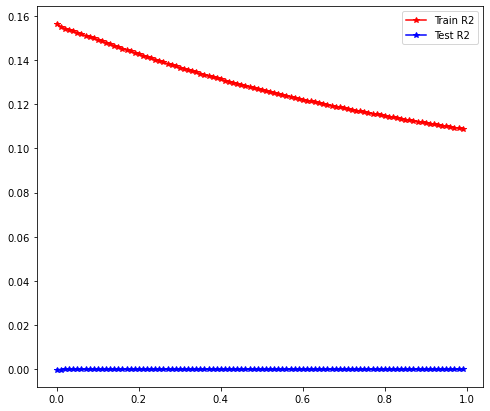

In [66]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_r, 'r*-')
plt.plot(Alpha, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show

Setelah dilakukan Manual Tuning, dapat dilihat nilai R2 untuk testing tidak dapat naik secara signifikan. Hal ini mungkin karena pemilihan mode

In [69]:
from sklearn.svm import SVR, SVC
## SVR => untuk Regresi

In [68]:
SVM_1 = SVR()

In [ ]:
SVM_1.fit(X_train_sc, y_train)